In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import minimize

In [160]:
data = pd.read_csv('Data/multidata.txt', names=["size","bedrooms","price"])
data.head()

,size,bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [161]:
data.describe()


,size,bedrooms,price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


The first column is the size of the house (in square feet), the second column is the number of bedrooms, and the third column is the price of the house

In [172]:
#getting the training set
X=np.array(data[['size','bedrooms']])
y=np.array(data['price'])
print(X.shape)
print(y.shape)

(47, 2)
(47,)


By looking at the values, note that house sizes are about 1000 times the number of bedrooms. When features differ by orders of magnitude, first performing feature scaling can make gradient descent converge much more quickly.

In [173]:
def featureNormalize(x):
    mu = np.mean(x,axis=0)
    sigma = np.std(x,axis=0)
    normalized_X = np.divide(x- mu,sigma)
    return (normalized_X, mu, sigma)

In [174]:
X_norm, mu, sigma = featureNormalize(X)
X_norm[:5,:]

array([[ 0.13141542, -0.22609337],
       [-0.5096407 , -0.22609337],
       [ 0.5079087 , -0.22609337],
       [-0.74367706, -1.5543919 ],
       [ 1.27107075,  1.10220517]])

In [175]:
#adding bias term
X_norm =np.hstack([np.ones([X_norm.shape[0],1]), X_norm])
X_norm[:5,:]


array([[ 1.        ,  0.13141542, -0.22609337],
       [ 1.        , -0.5096407 , -0.22609337],
       [ 1.        ,  0.5079087 , -0.22609337],
       [ 1.        , -0.74367706, -1.5543919 ],
       [ 1.        ,  1.27107075,  1.10220517]])

Text(0,0.5,'price of the house')

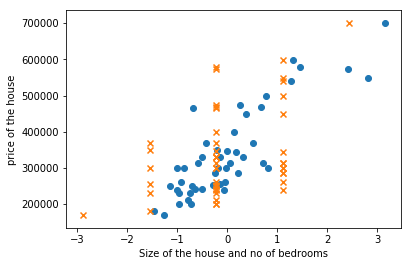

In [176]:
plt.scatter(X_norm[:,1],y,marker='o')
plt.scatter(X_norm[:,2],y,marker='x')
plt.xlabel('Size of the house and no of bedrooms')
plt.ylabel('price of the house')

In [185]:
#the convergence constant that decides how fast Gradient descen will converge
alpha=0.05
#no of iterations that decides how long gradient descent will run
iterations=400
theta = np.zeros((3, 1));

In [178]:
def normalEqn(X,y):
    theta = np.zeros((X.shape[1], 1))
    theta = np.linalg.pinv(np.transpose(X).dot(X)).dot(np.transpose(X).dot(y))
    return theta

In [186]:
#calculating gradient descent
def gradient(x,y,theta,iterations,alpha):
    m = y.size
    J_history = np.zeros((iterations, 1))
    for i in np.arange(iterations):
        theta = theta - alpha*(1.0/m) * np.transpose(x).dot(x.dot(theta) - np.transpose([y]))
        J_history[i] = cost(x, y, theta)
    return(theta, J_history)

In [187]:
#function to calculate the cost
def cost(x,y,theta):
    m = y.size
    J = 0
    s = np.power(( x.dot(theta) - np.transpose([y]) ), 2)
    J = (1.0/(2*m)) * s.sum( axis = 0 )
    return (J)

Initial Cost: [6.55915481e+10]
Theta:  [340412.65915621 109439.87553302  -6570.43391754]
Final Cost: [2.04328008e+09]


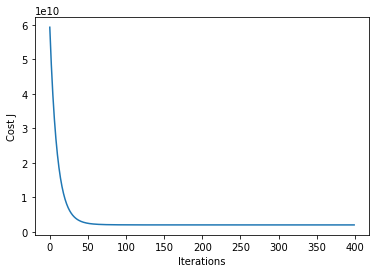

In [188]:
#getting the value of theta by running gradient descent
# theta for minimized cost J
print("Initial Cost:",cost(X_norm,y,theta))
t,grad = gradient(X_norm, y, theta,iterations, alpha);
print('Theta: ',t.ravel())
print("Final Cost:",cost(X_norm,y,t))
plt.plot(grad)
plt.ylabel('Cost J')
plt.xlabel('Iterations');


In [189]:
# Calculate the parameters from the normal equation
t_norm = normalEqn(X_norm, y)
print(t_norm)

[340412.65957447 109447.79646964  -6578.35485416]


In [199]:
ts=X_norm[:,1:]
for  i in range(len(ts)):
    y_predict=t[0]+t[1]*ts

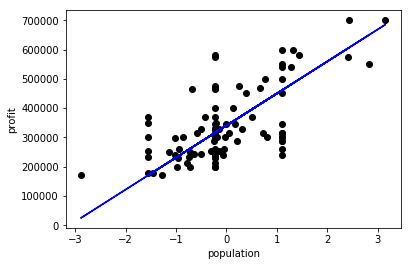

In [200]:
plt.figure()
plt.plot(ts,y,'o',color='black')
plt.plot(ts,y_predict,color='blue')
plt.xlabel('population')
plt.ylabel('profit')
plt.show()

In [201]:
#Multivariate Linear Regression model in python using scikit-learn
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [208]:
# Loading entire dataset
dataset = pd.read_csv('Data/car_data.csv', names=['symboling','normalized_losses','make','fuel_type','aspiration',
                                             'num_of_doors','body_style','drive_wheels','engine_location',
                                             'wheel_base','length','width','height','curb_weight','engine_type',
                                             'num_of_cylinders','engine_size','fuel_system','bore','stroke',
                                             'compression_ratio','horsepower','peak_rpm','city_mpg','highway_mpg',
                                             'price'], index_col=None)
dataset.head()
dataset.describe()

,symboling,wheel_base,length,width,height,curb_weight,engine_size,compression_ratio,city_mpg,highway_mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [210]:
# Select few important columns
dataset = dataset[['make', 'engine_size', 'horsepower', 'price']]
dataset.head()

,make,engine_size,horsepower,price
0,alfa-romero,130,111,13495
1,alfa-romero,130,111,16500
2,alfa-romero,152,154,16500
3,audi,109,102,13950
4,audi,136,115,17450


In [211]:
import numpy as np
dataset = dataset.replace('?', np.nan)

# Let's drop any null values
dataset = dataset.dropna()

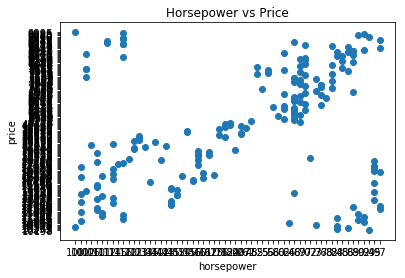

In [217]:
plt.scatter(dataset.horsepower, dataset.price);
plt.title('Horsepower vs Price');
plt.xlabel('horsepower');
plt.ylabel('price');

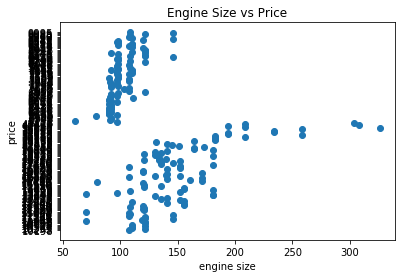

In [218]:
plt.scatter(dataset.engine_size, dataset.price);
plt.title('Engine Size vs Price');
plt.xlabel('engine size');
plt.ylabel('price');

In [219]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 3].values

In [221]:
#encode our categorical feature
#http://www.enlistq.com/feature-encoding-python-using-scikit-learn/
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
X_label_encoder = LabelEncoder()
X[:,0] = X_label_encoder.fit_transform(X[:,0])
one_hot_encoder = OneHotEncoder(categorical_features=[0])
X = one_hot_encoder.fit_transform(X).toarray()

In [222]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [223]:
# Training our model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting values using our trained model
y_pred = regressor.predict(X_test)

In [224]:
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score
ex_var_score = explained_variance_score(y_test, y_pred)
m_absolute_error = mean_absolute_error(y_test, y_pred)
m_squared_error = mean_squared_error(y_test, y_pred)
r_2_score = r2_score(y_test, y_pred)

print("Explained Variance Score: "+str(ex_var_score))
print("Mean Absolute Error "+str(m_absolute_error))
print("Mean Squared Error "+str(m_squared_error))
print("R Squared Error "+str(r_2_score))

Explained Variance Score: 0.9057498066881245
Mean Absolute Error 1933.5538983294912
Mean Squared Error 6265473.532265197
R Squared Error 0.8936070776234973
